In [ ]:
#@title Download data

!git clone https://github.com/dataconHack/hackathon.git

Cloning into 'hackathon'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 22.86 KiB | 3.27 MiB/s, done.


In [ ]:
#@title Installs
%%capture

!pip install klib

In [ ]:
import pandas as pd
import klib

In [ ]:
data = pd.read_csv('/content/hackathon/data.csv')
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
data.head()

,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,method,ZOI_drug,ZOI_NP,ZOI_drug_NP,fold_increase_in_antibacterial_activity (%),MDR_check
0,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,4.0,10.0,8.0,spherical,MIC,32+,6.3,32+,NaN,1
1,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,4.0,10.0,8.0,spherical,MIC,32+,6.3,32+,NaN,1
2,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,15.0,30.0,28.0,spherical,MIC,32+,25,32+,NaN,1
3,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,15.0,30.0,28.0,spherical,MIC,32+,25,32+,NaN,1
4,Micrococcus luteus,green_synthesis from fungus Aspergillus flavus,Vancomycin,Carboxylic acids and derivatives,30.0,100,5.0,30.0,21.0,spherical,disc_diffusion,0,14,17+2,7.02,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Bacteria                                     883 non-null    object 
 1   NP_Synthesis                                 883 non-null    object 
 2   Drug                                         642 non-null    object 
 3   Drug_class_drug_bank                         642 non-null    object 
 4   Drug_dose                                    577 non-null    float64
 5   NP_concentration                             633 non-null    object 
 6   NP size_min                                  883 non-null    float64
 7   NP size_max                                  883 non-null    float64
 8   NP size_avg                                  883 non-null    float64
 9   shape                                        883 non-null    object 
 10  me

***Заметки***

- Обратить внимание на фичу NP_concentration

  NP_concentration                             633 non-null    object

  тип данных object!

- Фичи связанные с ZOI

  все имеют тип object

  вероятно, нужно будет переводить в числовой


Displaying only columns with missing values.


GridSpec(6, 6)

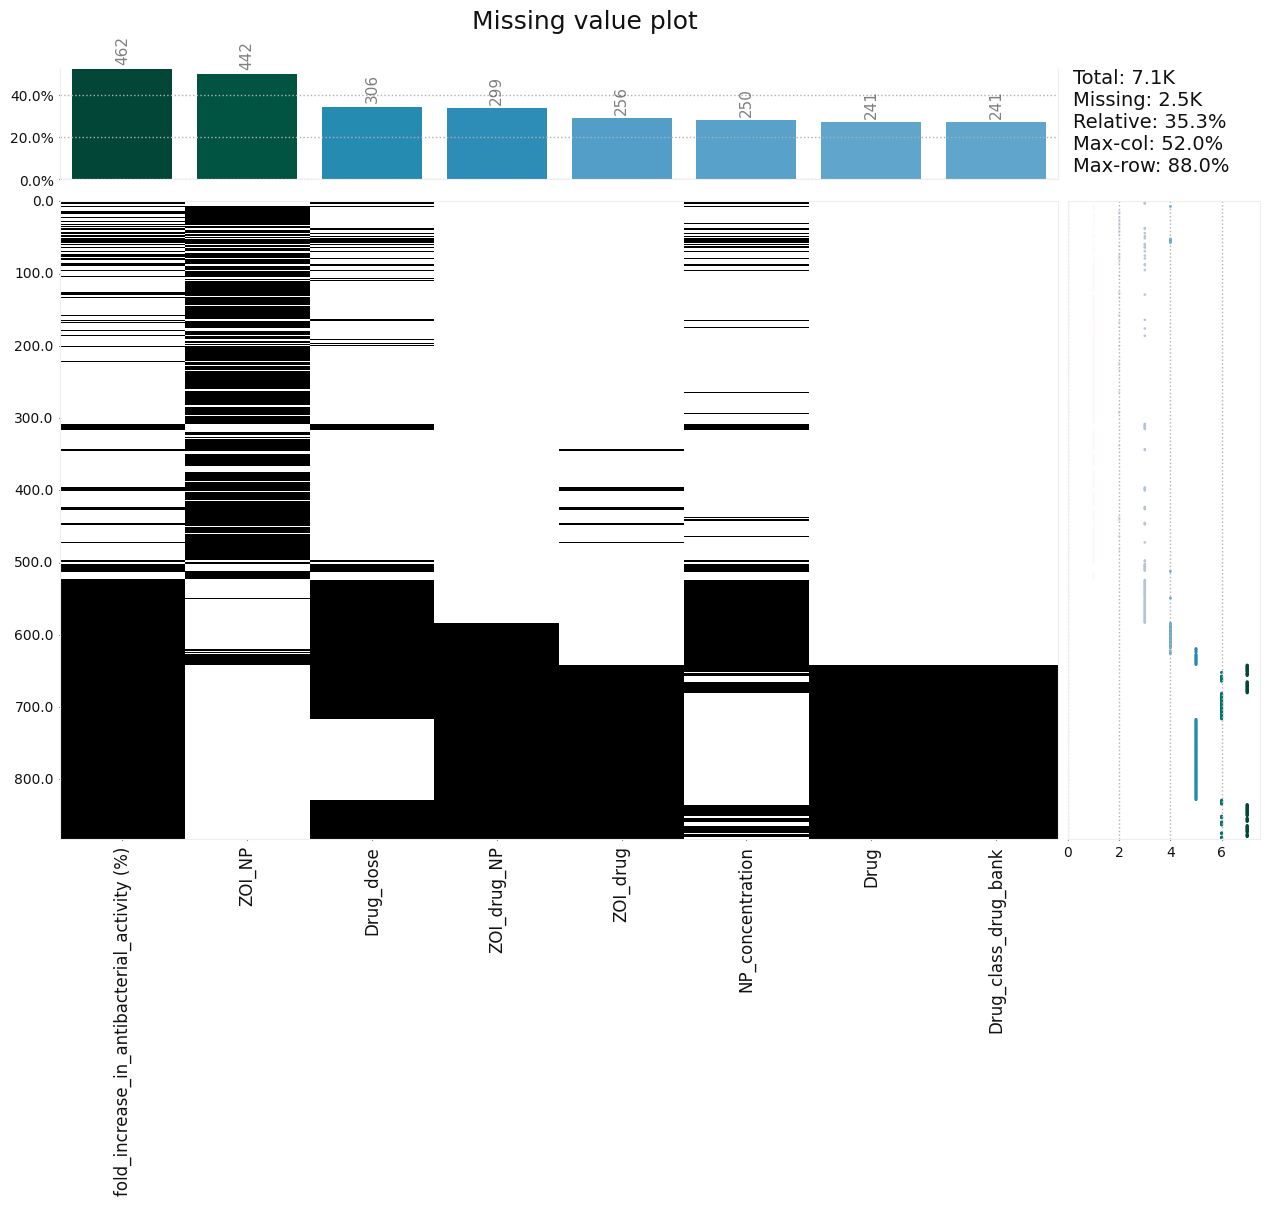

In [ ]:
klib.missingval_plot(data, figsize=(15,10), sort=True)

In [ ]:
drug_descriptors = pd.read_csv('/content/hackathon/drug_descriptors.csv')
drug_descriptors.drop(['Unnamed: 0'], axis=1, inplace=True)
drug_descriptors.rename(columns={'drug' : 'Drug'}, inplace=True)
drug_descriptors.head(3)

,Drug,chemID,prefered_name,smiles
0,Amoxicillin,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1,Penicillin,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2,Vancomycin,CHEMBL262777,VANCOMYCIN,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...


In [ ]:
drug_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   drug           44 non-null     object
 1   chemID         44 non-null     object
 2   prefered_name  44 non-null     object
 3   smiles         44 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


In [ ]:
klib.missingval_plot(drug_descriptors)

No missing values found in the dataset.


In [ ]:
bacterial_descriptors = pd.read_csv('/content/hackathon/bacterial_descriptors.csv')
bacterial_descriptors.head(3)

,Tax_id,Bacteria,kingdom,subkingdom,clade,phylum,class,order,family,genus,species,gram,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,isolated_from
0,['470'],Acinetobacter baumannii,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Moraxellales,Moraxellaceae,Acinetobacter,Acinetobacter calcoaceticus/baumannii complex,n,24.0,36.0,48.0,37,2,urine
1,['715'],Actinobacillus pleuropneumoniae,Bacteria,NaN,NaN,Pseudomonadota,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Actinobacillus,Actinobacillus pleuropneumoniae,n,24.0,36.0,48.0,37,2,lungs
2,['5599'],Alternaria alternata,Fungi,Dikarya,Opisthokonta,Ascomycota,Dothideomycetes,Pleosporales,Pleosporaceae,Alternaria,Alternaria alternata,NaN,48.0,192.0,336.0,30,2,food


In [ ]:
bacterial_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tax_id               59 non-null     object 
 1   Bacteria             59 non-null     object 
 2   kingdom              59 non-null     object 
 3   subkingdom           12 non-null     object 
 4   clade                33 non-null     object 
 5   phylum               59 non-null     object 
 6   class                59 non-null     object 
 7   order                59 non-null     object 
 8   family               59 non-null     object 
 9   genus                59 non-null     object 
 10  species              59 non-null     object 
 11  gram                 47 non-null     object 
 12  min_Incub_period, h  58 non-null     float64
 13  avg_Incub_period, h  59 non-null     float64
 14  max_Incub_period, h  58 non-null     float64
 15  growth_temp, C       59 non-null     int64

Displaying only columns with missing values.


GridSpec(6, 6)

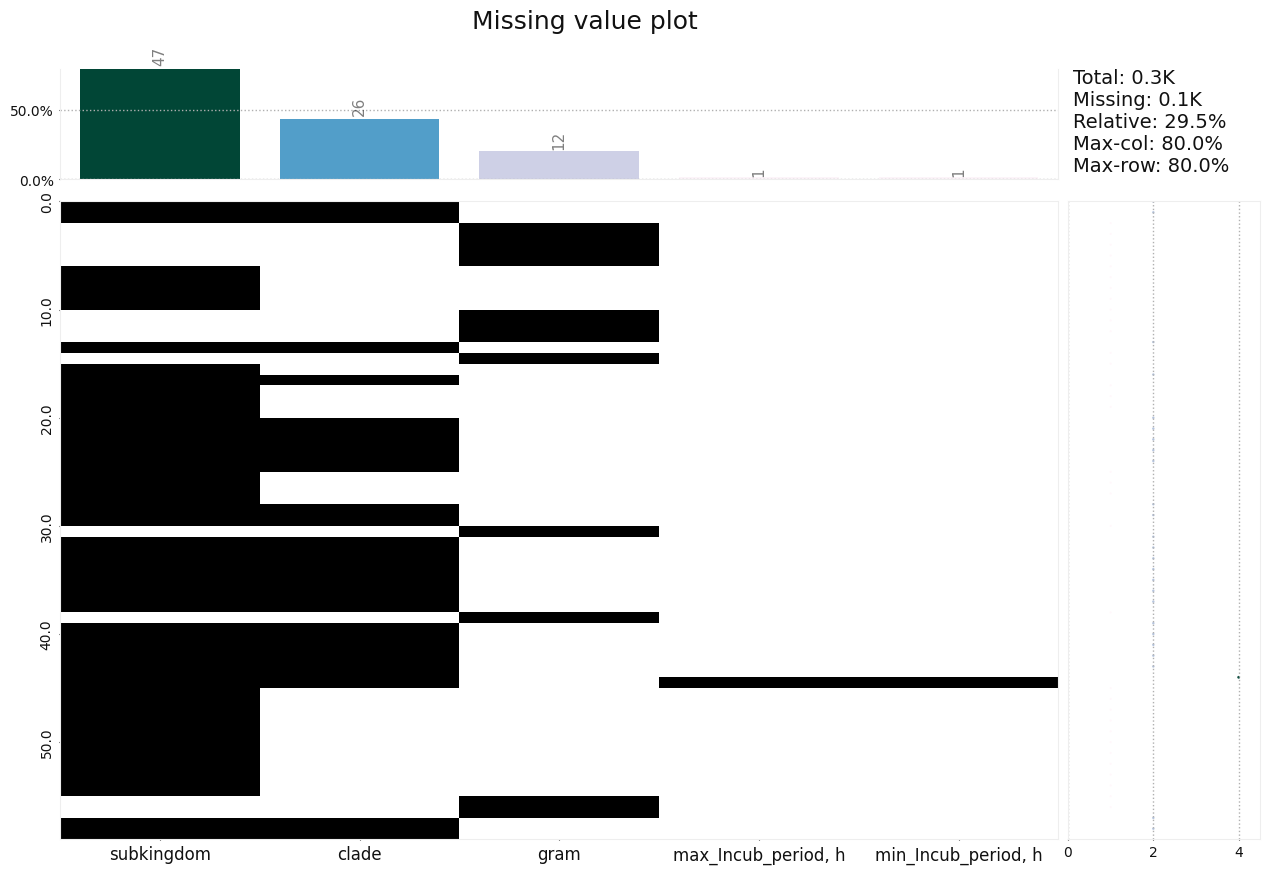

In [ ]:
klib.missingval_plot(bacterial_descriptors, figsize=(15,10), sort=True)

***ЭТАП I***

*Собрать всё в один датасет*

Необходимо будет три БД склеить в одну. В основной БД (data) в фиче Bacteria пропусков нет - можно замерджить по ключу с БД по бактериям (bacterial_descriptors).

С драгами сложнее - есть пропуски, непонятно по какому ключу мерджить. Кажется, что в строках, где отсутсвует drug ещё куча пропусков и лучше будет дропнуть такие сэмплы.

Посмотрим на бактерии, которые есть в data, но отсутствуют в bacterial_descriptors

In [ ]:
bacterias_data = data['Bacteria'].unique()
bacterias = bacterial_descriptors['Bacteria'].unique()
sorted(list(set(bacterias_data) - set(bacterias)))

['Acinetobacter baumanii',
 'Actinobacillus pleuropneumoniae ',
 'Bacillus spp.        ',
 'Candida glochares',
 'Enterobacter cloacae ',
 'Salmonella  typhi',
 'Salmonella Paratyphi',
 'Serratia marcescens']

И наоборот

In [ ]:
sorted(list(set(bacterias) - set(bacterias_data)))

['Acinetobacter baumannii',
 'Actinobacillus pleuropneumoniae',
 'Alternaria alternata',
 'Aspergillus flavus',
 'Aspergillus nidulans',
 'Aspergillus niger',
 'Bacillus licheniformis',
 'Bacillus sp.',
 'Citrobacter freundii',
 'Cladosporium herbarum',
 'Corynebacterium xerosis',
 'Enterobacter cloacae',
 'Enterococcus sp.',
 'Escherichia coli O157',
 'Lactococcus lactis',
 'Pencillium chrysogenum',
 'Pseudomonas putida',
 'Pseudomonas sp.',
 'Rhizopus stolonifer',
 'Salmonella sp.',
 'Salmonella typhi',
 'Salmonella typhimurium',
 'Staphylococcus saprophyticus',
 'Staphylococcus sciuri',
 'Staphylococcus sp.',
 'Streptococcus pyogenes',
 'Streptococcus viridans',
 'Trichoderma harzianum',
 'Trichothecium roseum']

**Попробовать дополнить bacterial_descriptors сэмплами выше, если нет похожил. И нужно исправить ошибки в названиях для корректного мерджа**

Замерджим датасеты

In [ ]:
data2 = pd.merge(data, bacterial_descriptors, how='left', on=['Bacteria'])
data2.head(3)

,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,...,family,genus,species,gram,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,isolated_from
0,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,4.0,10.0,8.0,spherical,...,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine
1,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,4.0,10.0,8.0,spherical,...,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine
2,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,15.0,30.0,28.0,spherical,...,Enterobacteriaceae,Escherichia,Escherichia coli,n,48.0,84.0,120.0,37.0,2.0,urine


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 882
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Bacteria                                     883 non-null    object 
 1   NP_Synthesis                                 883 non-null    object 
 2   Drug                                         642 non-null    object 
 3   Drug_class_drug_bank                         642 non-null    object 
 4   Drug_dose                                    577 non-null    float64
 5   NP_concentration                             633 non-null    object 
 6   NP size_min                                  883 non-null    float64
 7   NP size_max                                  883 non-null    float64
 8   NP size_avg                                  883 non-null    float64
 9   shape                                        883 non-null    object 
 10  me

Аналогично с лекарствами

In [ ]:
drugs_data = data['Drug'].unique()
drugs = drug_descriptors['Drug'].unique()
list(set(drugs_data) - set(drugs))

[nan, 'Neomycin']

In [ ]:
list(set(drugs) - set(drugs_data))

[]

Тут всё более-менее чистенько. Единственное, что много нанов в data и один drug отсутствует в drug_descriptors. Можно попробовать найти, либо дропнуть потом.

In [ ]:
data3 = pd.merge(data2, drug_descriptors, how='left', on=['Drug'])
data3.head(3)

,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,Drug_dose,NP_concentration,NP size_min,NP size_max,NP size_avg,shape,...,gram,"min_Incub_period, h","avg_Incub_period, h","max_Incub_period, h","growth_temp, C",biosafety_level,isolated_from,chemID,prefered_name,smiles
0,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,4.0,10.0,8.0,spherical,...,n,48.0,84.0,120.0,37.0,2.0,urine,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...
1,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Penicillin,Carboxylic acids and derivatives,NaN,NaN,4.0,10.0,8.0,spherical,...,n,48.0,84.0,120.0,37.0,2.0,urine,CHEMBL1223,PENICILLIN G POTASSIUM,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...
2,Escherichia coli,chem_synthesis_reduction_by_D_maltose,Amoxicillin,Lactams,NaN,NaN,15.0,30.0,28.0,spherical,...,n,48.0,84.0,120.0,37.0,2.0,urine,CHEMBL1082,AMOXICILLIN,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 882
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Bacteria                                     883 non-null    object 
 1   NP_Synthesis                                 883 non-null    object 
 2   Drug                                         642 non-null    object 
 3   Drug_class_drug_bank                         642 non-null    object 
 4   Drug_dose                                    577 non-null    float64
 5   NP_concentration                             633 non-null    object 
 6   NP size_min                                  883 non-null    float64
 7   NP size_max                                  883 non-null    float64
 8   NP size_avg                                  883 non-null    float64
 9   shape                                        883 non-null    object 
 10  me

Displaying only columns with missing values.


GridSpec(6, 6)

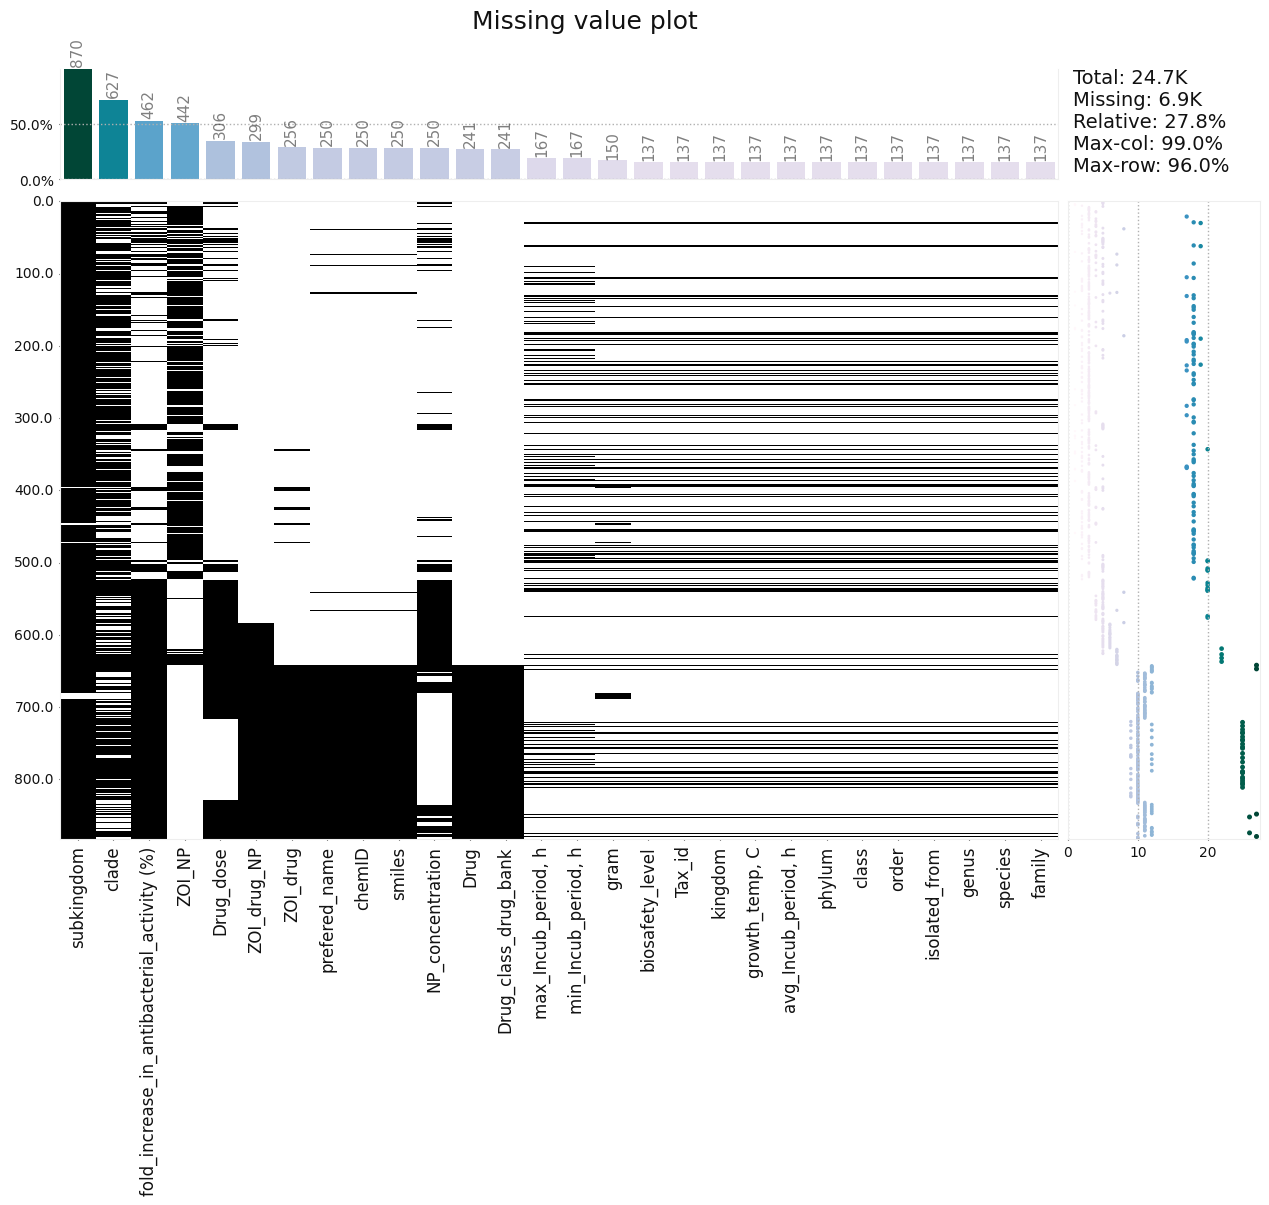

In [ ]:
klib.missingval_plot(data3, figsize=(15,10), sort=True)